In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv('C:/Users/shri/Desktop/advertising.csv')
d

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
#basics checks
d.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
d.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
d.shape

(200, 4)

In [6]:
d.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
d.isnull().sum()
## no missing values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


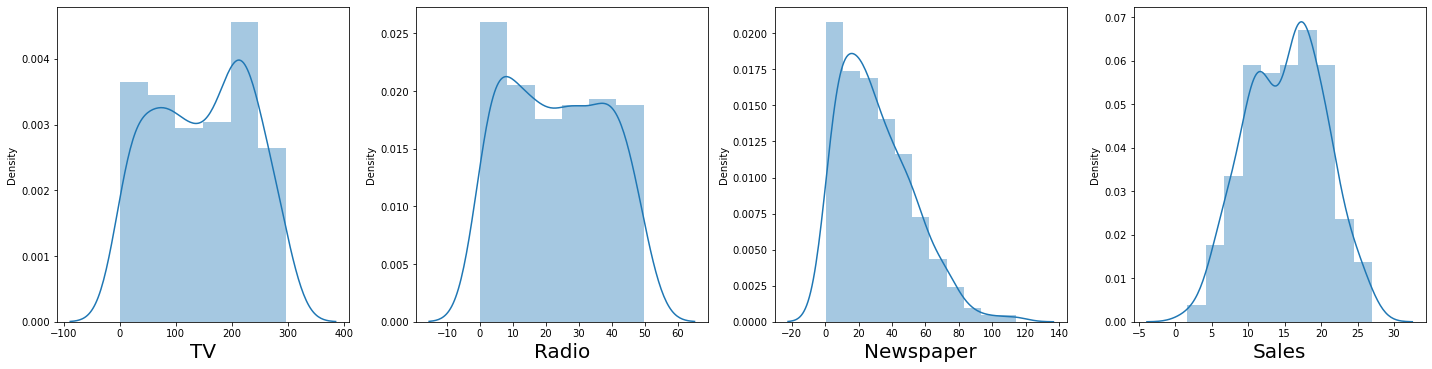

In [12]:
#eda
#univariate analysis
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d:
    if plotnumber<=12 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(x=d[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()
#insights
# news paper variable is not normally distrubuted , it is right skewed
# sales variable is approx normally distrubuted
# tv and radio variables are not normally distrubuted

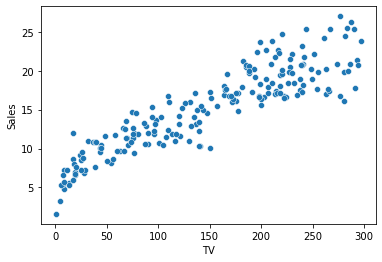

In [14]:
#bivariate analysis
sns.scatterplot(y=d.Sales, x=d.TV)
plt.show()
# we can see that tv have direct impact on the sales, infact its directly proportional 


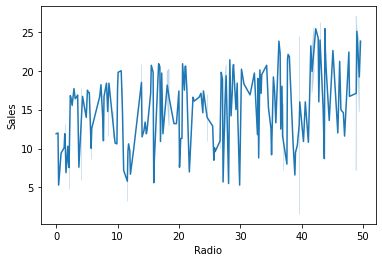

In [18]:
#bivariate analysis
sns.lineplot(y=d.Sales, x=d.Radio)
plt.show()
# radio have no direct impact on sales we cannot extract a definnite relationship from the graph
# maybe the trend is seasonal which depends on some external factor

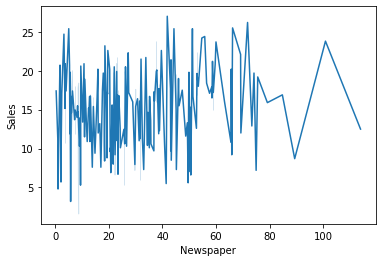

In [19]:
#bivariate analysis
sns.lineplot(y=d.Sales, x=d.Newspaper)
plt.show()
# even the newspaper has no direct imact on the sales
# we can say that overall the sales are constant here

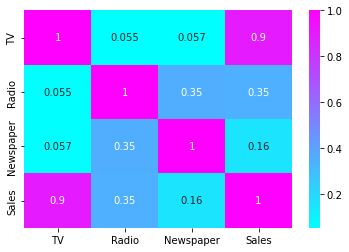

In [17]:
#feature selection
#correlation
sns.heatmap(d.corr(),annot=True,cmap='cool')
plt.show()
#only tv and sales columns are having high correlation between each other, that means even if we drop the TV column there wont be much difference in the model performance


In [22]:
#model creation
#dividing data into depndent and independent variables
x=d.iloc[:,:3]
y=d.Sales

In [23]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [25]:
#creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
x_test.shape

(40, 3)

In [27]:
x_train.shape

(160, 3)

In [28]:
#importing algorithm
from sklearn.linear_model import LinearRegression
#creating object for alg
LR=LinearRegression()


In [29]:
#training the alg
LR.fit(x_train,y_train)

LinearRegression()

In [30]:
#testing the alg
LR.fit(x_test,y_test)
#model evaluation 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [31]:
#getting predicted data for test
y_pred=LR.predict(x_test)
y_pred

array([16.59228151, 20.38768594, 23.2099956 ,  9.15579676, 22.20827007,
       12.27948104, 21.21419823,  8.13985843, 16.40617612, 16.19441548,
        8.91394131,  7.64542825, 16.60689803,  8.14318016, 11.68940012,
       14.02042849,  7.81320105, 17.61776595, 10.53050903, 20.32061142,
       20.11369326, 11.7060978 , 11.21817363, 21.81733596,  8.97805994,
        7.07730327, 20.87942824, 13.37336863, 10.12195083,  8.00412161,
       15.03530666, 10.31694963, 20.74973941, 10.0306614 , 20.74360591,
       21.27235728, 12.65428834, 22.14911061, 12.23892258,  5.63000201])

In [32]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [33]:
#getting predicted data for training
y_pred_train=LR.predict(x_train)
y_pred_train


array([11.16448321, 14.76035672,  9.60132386,  8.93132042, 16.34827382,
        6.51924822,  9.67323938, 14.9547945 , 10.22269477, 11.61229925,
       14.07549747, 13.9745263 , 10.34702243,  9.1684844 ,  8.19818846,
       11.57792401, 10.12788942, 24.78427638,  7.60232386, 15.12856815,
       20.7064057 , 16.58946789, 12.14505475,  9.44626651, 20.20360232,
        7.0319651 , 23.43108701,  6.48676458, 11.87753318, 10.39980221,
       10.6907906 ,  8.33539727, 16.38310881, 17.65051814, 15.08199221,
       17.93954675, 15.45180451, 19.6564532 , 16.2908554 , 21.82318736,
       10.4556245 , 14.13259137,  9.95108804, 17.93562587,  9.48860276,
       16.4279187 , 12.97446676, 24.03938968, 11.44001512, 23.2839763 ,
        6.51348299, 18.57459228, 24.06240898, 20.9441152 , 18.69277825,
       16.66819503, 13.31113801, 11.23282989, 19.00496365, 14.8334036 ,
       14.83048127,  9.31271985, 19.97279382, 11.81751957, 21.24767546,
       10.90998435,  8.22607306, 18.78017556, 15.49845593, 17.88

In [34]:
#r2 score for train
r2_train=r2_score(y_train,y_pred_train)
print('training performance:', r2_train*100,'%')

training performance: 88.79190891395372 %


In [35]:
#adjusted_r2 score
adj_r2=1-(((1-r2_train)*(160-1))/(160-3-1))
adj_r2

0.8857636870076052

In [36]:
#r2 score for test data
r2_test=r2_score(y_test,y_pred)
r2_test

0.9173258971397072

In [37]:
#adjusted r2 score for test data
adj_r2_test=1-(((1-r2_test)*(40-1))/(40-3-1))
adj_r2_test

0.9104363885680162

In [38]:
#mse for test data
mse=mean_squared_error(y_test,y_pred)
mse

2.554720719896192

In [39]:
#rmse for test data
np.sqrt(mse)

1.5983493735401506

In [40]:
#mae for test data
mae=mean_absolute_error(y_test,y_pred)
mae

1.2534650576521855